# Titanic Tutorial
### Solving Date: Jan 5th, 2024 ~ Jan 7th, 2024
#### Written by: [Jehwan Kim](https://github.com/kreimben)
#### Followed Materials:
* https://www.kaggle.com/competitions/titanic/data
* https://www.kaggle.com/code/prashant111/a-reference-guide-to-feature-engineering-methods
* https://www.kaggle.com/learn/feature-engineering
* https://velog.io/@baeyuna97/Feature-engineering%EC%9D%B4%EB%9E%80
* https://www.kaggle.com/code/aimack/how-to-handle-skewed-distribution

# Load datasets

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


There are not seem to be there which is not numeric.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


`Cabin`과 `Age`에 빈값들이 많다. 채우거나 버리거나 둘중에 하나를 해야할 것 같다.
특이하게 `Embarked`에는 빈값이 2개밖에 없다. 그냥 최빈값을 넣어도 영향을 주지 않을것 같다.

In [6]:
# before continue, just convert `sex` value (string to binary)
df['Sex'] = df.Sex.apply(lambda x: 0 if x == 'male' else 1)
test['Sex'] = test.Sex.apply(lambda x: 0 if x == 'male' else 1)

In [7]:
df[['Name', 'Sex']].head() # check
test[['Name', 'Sex']].head()

,Name,Sex
0,"Kelly, Mr. James",0
1,"Wilkes, Mrs. James (Ellen Needs)",1
2,"Myles, Mr. Thomas Francis",0
3,"Wirz, Mr. Albert",0
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1


## Comparing features against target

What I have to submit to kaggle is just predicting whether a passenger survived or not.

In [8]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [9]:
df['Survived'].value_counts(normalize=True)  # normalize=True: 비율로 보여줌

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

<Axes: xlabel='Survived'>

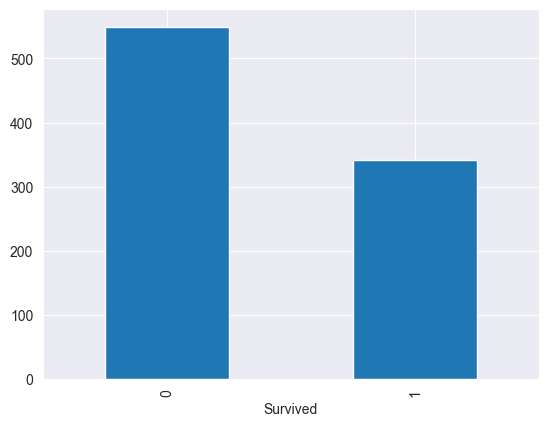

In [10]:
df['Survived'].value_counts().plot.bar()  # 단순 생존자 수

<Axes: xlabel='Survived'>

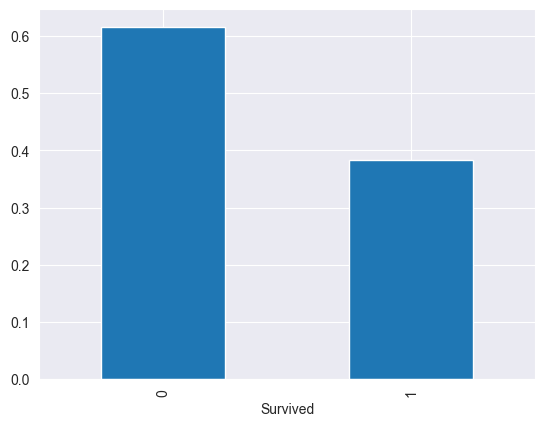

In [11]:
df['Survived'].value_counts(normalize=True).plot.bar()  # 단순 생존자 비율

,Survived
Sex,
0,0.188908
1,0.742038


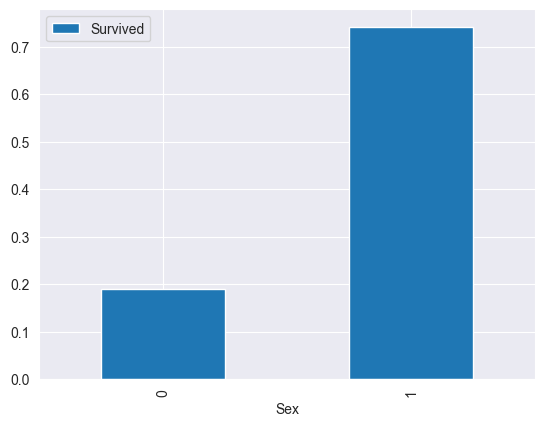

In [12]:
df[['Sex', 'Survived']].groupby('Sex').mean().plot.bar()  # 성별 생존자 비율
df[['Sex', 'Survived']].groupby('Sex').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


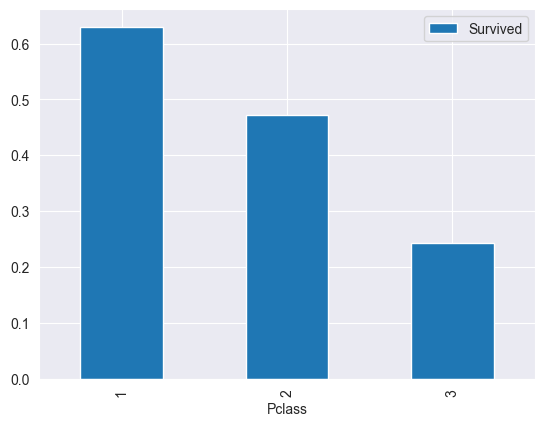

In [13]:
df[['Pclass', 'Survived']].groupby('Pclass').mean().plot.bar()  # 좌석 등급별 생존자 비율
df[['Pclass', 'Survived']].groupby('Pclass').mean()

Survived
Sex Pclass          
0   1       0.368852
    2       0.157407
    3       0.135447
1   1       0.968085
    2       0.921053
    3       0.500000

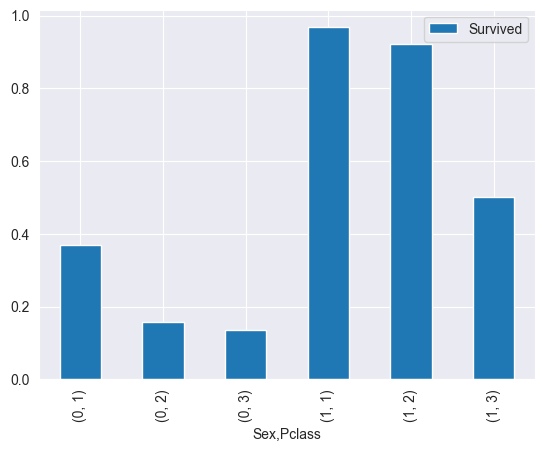

In [14]:
df[['Sex', 'Pclass', 'Survived']].groupby(['Sex', 'Pclass']).mean().plot.bar()  # 성별, 좌석 등급별 생존자 비율
df[['Sex', 'Pclass', 'Survived']].groupby(['Sex', 'Pclass']).mean()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

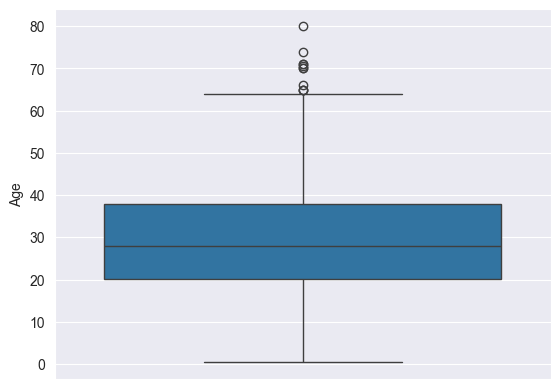

In [15]:
# 나이대 별 분포 표
# df['Age'].plot.hist(bins=30, grid=True)
# sns.kdeplot(df.Age)
sns.boxplot(y=df.Age)
# sns.violinplot(y=df.Age)
# sns.stripplot(y=df.Age)
df['Age'].describe()  # outlier가 많은것이 확인된다.

<Axes: xlabel='Age', ylabel='Density'>

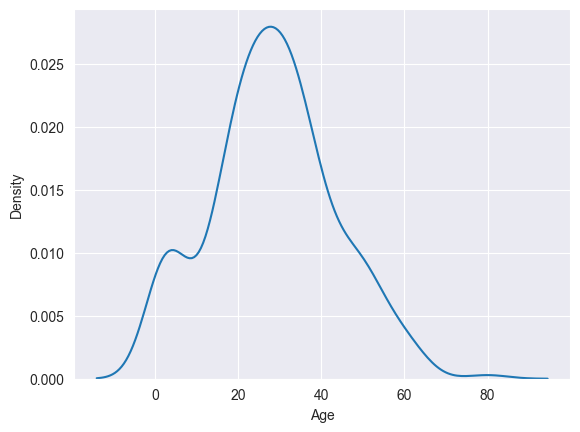

In [16]:
sns.kdeplot(df.Age[df.Survived == 1], label='Survived')

<Axes: xlabel='Age', ylabel='Density'>

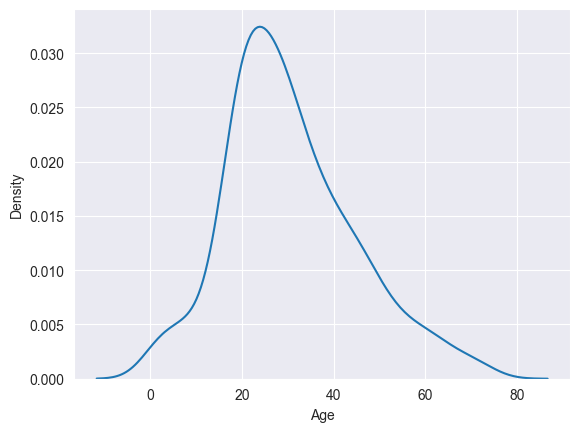

In [17]:
sns.kdeplot(df.Age[df.Survived == 0], label='Not Survived')

<Axes: xlabel='Pclass', ylabel='Age'>

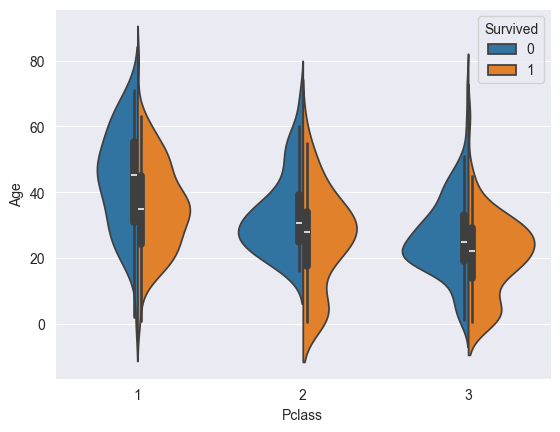

In [18]:
# pclass와 age로 보는 생존자 비율
sns.violinplot(x=df.Pclass, y=df.Age, hue=df.Survived, split=True)

<Axes: xlabel='Sex', ylabel='Age'>

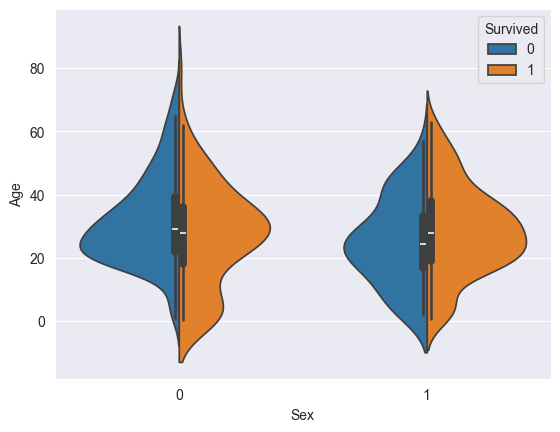

In [19]:
# sex와 age로 보는 생존자 비율
sns.violinplot(x=df.Sex, y=df.Age, hue=df.Survived, split=True)

## Filling missing data

How to fill missing data?
1. MCAR (Missing Completely At Random) => 랜덤하게 아무런 값이나 다 넣는다. 다른 연관관계가 없어진다.
2. MAR (Missing At Random) => 다른 feature들과 연관관계가 있는 경우, 그 연관관계를 이용해 채운다.
3. MNAR (Missing Not At Random) => 빈값이지만, 다른 시스템이나 어떠한것을 이용해 채운다면 사실 랜덤이 아니다.

1. Deleting Rows with missing values => 빈값이 너무 많은 경우 부적합.
1. Impute missing values for continuous variable
1. Impute missing values for categorical variable
1. Using Algorithms that support missing values
1. Prediction of missing values
1. Imputation using Deep Learning Library => Use automated feature engineering libary. => 그냥 라이브러리 가져다 써서 결과 만드는 백엔드 엔지니어랑 무엇이 다른가?

### 1. 우선 *완전한 랜덤값*을 넣어보자 (`Age`, `Cabin`, `Embarked`).

In [20]:
# df['Age'] = df[ df.Age.isna() ].transform(lambda x: x.fillna(np.random.randint(0, 80, size=len(x)))) # 이미 있는 값의 최솟값과 최댓값에 의존하여 0세부터 80세까지 랜덤 값을 넣어준다.
df.fillna(value={'Age': pd.Series(np.random.randint(0, 80, size=len(df)))}, inplace=True)
test.fillna(value={'Age': pd.Series(np.random.randint(0, 80, size=len(test)))}, inplace=True)

In [21]:
df.Age.isna().sum() # 빈값이 없어졌다.

0

<Axes: xlabel='Age', ylabel='Density'>

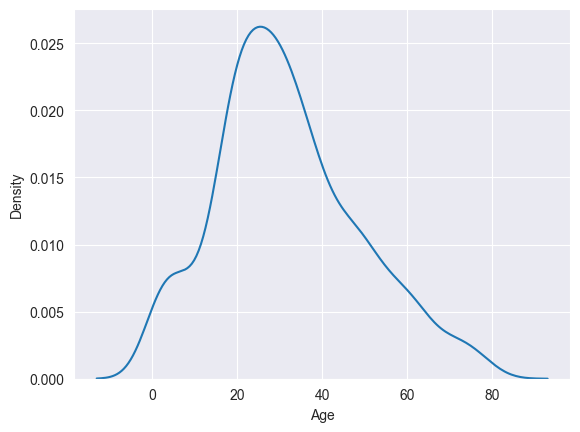

In [22]:
sns.kdeplot(df.Age) # 랜덤하게 넣었기 때문에, 이전보다 더 랜덤하게 분포되었다.

<Axes: xlabel='Age', ylabel='Density'>

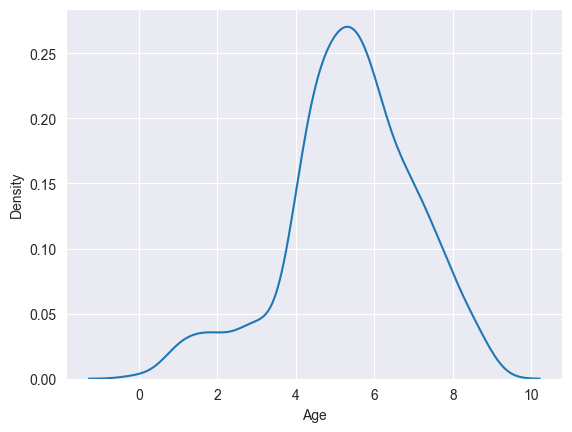

In [23]:
df_sqrt = np.sqrt(df.Age)
test_sqrt = np.sqrt(test.Age)
sns.kdeplot(df_sqrt)

-0.4962162554746954

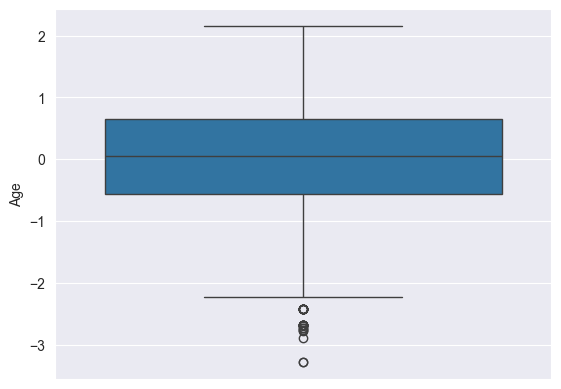

In [24]:
# normalisation using normal distribution
df_norm = (df_sqrt - df_sqrt.mean()) / df_sqrt.std()
test_norm = (test_sqrt - test_sqrt.mean()) / test_sqrt.std()
sns.boxplot(df_norm)
df_norm.skew()

-0.49621625547469517

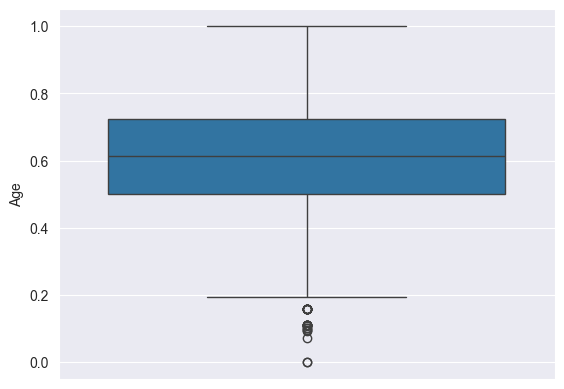

In [25]:
# normalisation using Min-Max
df_minmax = (df_sqrt - df_sqrt.min()) / (df_sqrt.max() - df_sqrt.min())
test_minmax = (test_sqrt - test_sqrt.min()) / (test_sqrt.max() - test_sqrt.min())
sns.boxplot(df_minmax)
df_minmax.skew()

~~나름 비대칭이 줄어들었다. 하지만 이게 더 좋은 결과를 가져올지는 모르겠다.~~
skewness가 꽤 높다. `Age` 역시 1-100 사이의 값으로 만들어 준 뒤 box-cox를 취해보자. 

0

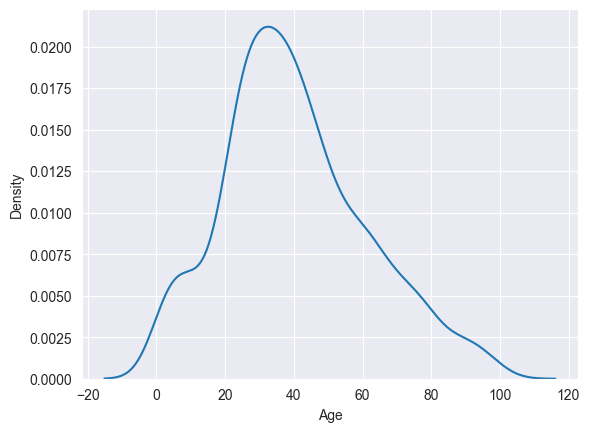

In [26]:
df_age = (df.Age - df.Age.min()) * 99/(df.Age.max() - df.Age.min()) + 1
test_age = (test.Age - test.Age.min()) * 99/(test.Age.max() - test.Age.min()) + 1
sns.kdeplot(df_age)
df_age.isna().sum()

-0.05197061307357757

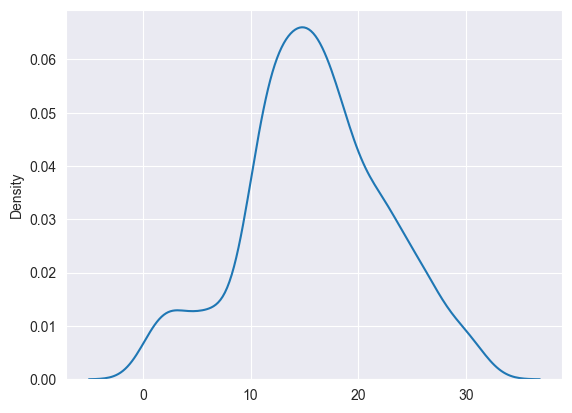

In [27]:
df_age_boxcox, _ = stats.boxcox(df_age)
test_age_boxcox, _ = stats.boxcox(test_age)
sns.kdeplot(df_age_boxcox)
pd.Series(df_age_boxcox).skew() # -0.057096658080305084
# 역시나 box-cox를 취하니 skewness가 많이 줄어들었다.

# 이걸 다시 표준화 시켜준다.

-0.05197061307357754

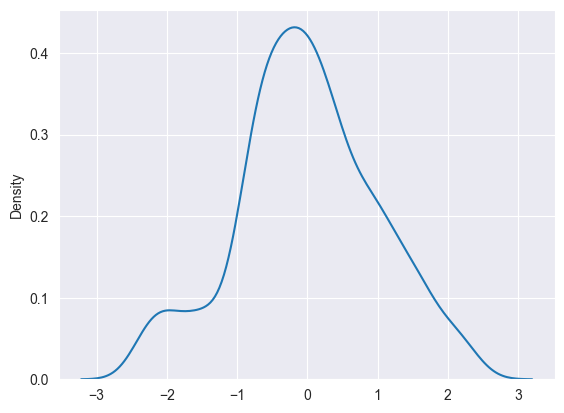

In [28]:
df_age_boxcox_norm = (df_age_boxcox - df_age_boxcox.mean()) / df_age_boxcox.std()
test_age_boxcox_norm = (test_age_boxcox - test_age_boxcox.mean()) / test_age_boxcox.std()
sns.kdeplot(df_age_boxcox_norm)
pd.Series(df_age_boxcox_norm).skew() # -0.04735906397879103

In [29]:
df['Age'] = pd.Series(df_age_boxcox_norm)
test['Age'] = pd.Series(test_age_boxcox_norm)
df.Age

0     -0.505202
1      0.432943
2     -0.254766
3      0.268395
4      0.268395
         ...   
886   -0.194098
887   -0.702477
888   -0.505202
889   -0.254766
890    0.099322
Name: Age, Length: 891, dtype: float64

In [30]:
# 그 다음 `Cabin`을 채워보자.
df.Cabin.isna().sum() # 빈값이 687개나 있다. 완전히 `Cabin`을 없앨 수도 있지만 결과는 나중에 확인해보자.

687

In [31]:
df.Cabin.info() # 값들을 확인해보면 object, 즉 String 값들로 채워져 있고,

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Cabin
Non-Null Count  Dtype 
--------------  ----- 
204 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


In [32]:
df.Cabin.value_counts() # 그나마 있는 값들 중에서도 거의 대부분 중복이 없다는 것을 확인 할 수 있다.

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

그래서 이번에는 빈값을 `X`로 채워보자. (이것도 랜덤하게 채우는 것과 비슷하다.)

In [33]:
df.fillna(value={'Cabin': 'X'}, inplace=True)
test.fillna(value={'Cabin': 'X'}, inplace=True)

In [34]:
df.Cabin.isna().sum() # 빈값이 없어졌다.

0

In [35]:
df.Cabin.value_counts() # `X`가 687개로 채워졌다.

Cabin
X              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 148, dtype: int64

추가적인 정형화를 위하여 `Cabin`의 첫번째 글자만 가져오자.

In [36]:
df.Cabin = df.Cabin.apply(lambda x: x[0]) # 첫번째 글자만 가져온다.
test.Cabin = test.Cabin.apply(lambda x: x[0])

In [37]:
df.Cabin.value_counts() # `X`가 687개로 채워졌다.

Cabin
X    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64

In [38]:
df.Cabin = df.Cabin.apply(lambda x: 0 if x == 'X' else 1) # `X`는 0으로, 나머지는 1로 바꾼다.
test.Cabin = test.Cabin.apply(lambda x: 0 if x == 'X' else 1)

In [39]:
df.Cabin.value_counts() # `X`가 687개로 채워졌다.

Cabin
0    687
1    204
Name: count, dtype: int64

# 그 다음 `Embarked`를 채워보자.

In [40]:
df.Embarked.isna().sum() # 빈값이 2개 있다.

2

In [41]:
df.Embarked.value_counts() # 최빈값은 `S`이다.

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [42]:
df.fillna(value={'Embarked': 'S'}, inplace=True) # 나머지 2개도 그냥 최빈값인 `S`로 채워준다.
test.fillna(value={'Embarked': 'S'}, inplace=True)

In [43]:
df.Embarked.isna().sum() # 빈값이 없어졌다.

0

In [44]:
df.Embarked.value_counts() # `S`가 646개로 채워졌다.

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [45]:
df.Embarked = df.Embarked.apply(lambda x: 0 if x == 'S' else 1) # `S`는 0으로, 나머지는 1로 바꾼다.
test.Embarked = test.Embarked.apply(lambda x: 0 if x == 'S' else 1)
test.Embarked = df.Embarked

In [46]:
df.Embarked.value_counts() # `S`가 646개로 채워졌다.

Embarked
0    646
1    245
Name: count, dtype: int64

In [47]:
df.info() # 사용할 feature들의 모든 값들이 숫자로 바뀌었다.
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int64  
 11  Embarked     891 non-null    int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [48]:
# test.Fare에 하나 빈값이 있는데 그냥 평균값으로 채워주자.
test.fillna(value={'Fare': test.Fare.mean()}, inplace=True)

이제 필요 없는 features들을 제거해보자.

In [49]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Parch', 'SibSp'], axis=1, inplace=True)
test.drop(['PassengerId','Name', 'Ticket', 'Parch', 'SibSp'], axis=1, inplace=True)

In [50]:
df.head(2)

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked
0,0,3,0,-0.505202,7.2500,0,0
1,1,1,1,0.432943,71.2833,1,1


In [51]:
test.head(2)

,Pclass,Sex,Age,Fare,Cabin,Embarked
0,3,0,0.210817,7.8292,0,0
1,3,1,0.857138,7.0000,0,1


In [52]:
df.info() # 사용할 feature들의 모든 값들이 숫자로 바뀌었다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   Fare      891 non-null    float64
 5   Cabin     891 non-null    int64  
 6   Embarked  891 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


이제 카테고리화 돼있는 값들을 one-hot encoding 해보자.
(이는 컴퓨터가 더 잘 학습 할 수 있게 만들어준다고 한다...)

In [53]:
df = pd.get_dummies(df, columns=['Pclass', 'Embarked', 'Cabin'])
test = pd.get_dummies(test, columns=['Pclass', 'Embarked', 'Cabin'])

In [54]:
df
test

,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_0,Embarked_1,Cabin_0,Cabin_1
0,0,0.210817,7.8292,False,False,True,True,False,True,False
1,1,0.857138,7.0000,False,False,True,False,True,True,False
2,0,1.558696,9.6875,False,True,False,True,False,True,False
3,0,-0.215929,8.6625,False,False,True,True,False,True,False
4,1,-0.523214,12.2875,False,False,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...
413,0,0.292183,8.0500,False,False,True,True,False,True,False
414,1,0.451517,108.9000,True,False,False,True,False,False,True
415,0,0.425261,7.2500,False,False,True,True,False,True,False
416,0,-1.646057,8.0500,False,False,True,True,False,True,False


count    891.000000
mean       7.222984
std        9.602516
min        1.000000
25%        2.528567
50%        3.793059
75%        6.990289
max      100.000000
Name: Fare, dtype: float64

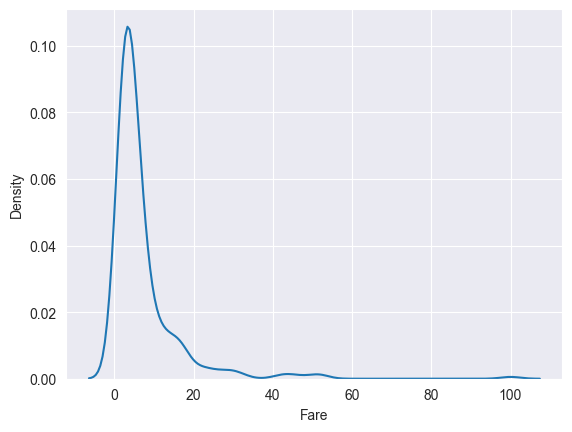

In [55]:
# 남은 Fare를 Min-Max를 이용한 1-10까지 값을 메기게 해보자. 
# (표준편차를 이용해 값을 만들면 음수가 생기면 skewness가 생기고 그로 인해 sqrt나 log를 취해 줄 수가 없기 때문에; 그러면 NaN이 생긴다...)
df_fare = (df.Fare - df.Fare.min()) * 99/(df.Fare.max() - df.Fare.min()) + 1
test_fare = (test.Fare - test.Fare.min()) * 99/(test.Fare.max() - test.Fare.min()) + 1
# df_fare = (df.Fare - df.Fare.min())/(df.Fare.max() - df.Fare.min())
sns.kdeplot(df_fare)

# df_fare = (df.Fare - df.Fare.mean())/df.Fare.std()
# sns.distplot(df_fare)
df_fare.describe()

In [56]:
# sns.boxplot(y=df_fare)
# df_fare.describe()
# df_fare.isna().sum()

뭔가 outlier도 많고, 한쪽으로 치우쳐져 있다. 그래서 sqrt를 취해 skewness를 줄여봤다.

0.03962765832371006

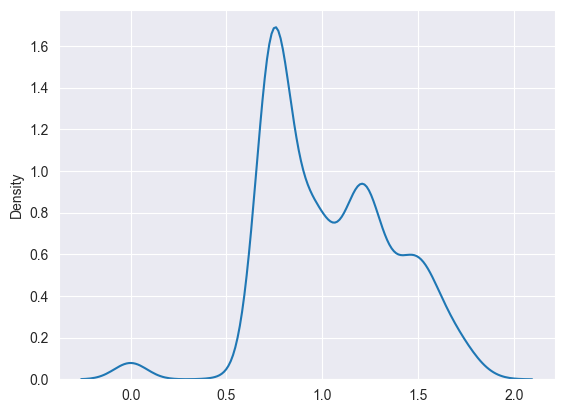

In [57]:
# df_fare_log = np.log1p(df.Fare)
# 
# sns.distplot(df_fare_log)
# df_fare_log.isna().sum()
# df_fare_log.skew() # 0.3949280095189306 / 0 이면 완벽하게 대칭이다.

from scipy import stats

df_fare_boxcox, _ = stats.boxcox(df_fare)

sns.kdeplot(df_fare_boxcox)
pd.Series(df_fare_boxcox).skew() # 0.03962765832371006
# 일반적으로 표준편차를 이용해 만들거나, min-max를 이용하는 것 보다 box-cox를 이용하니 훨씬 더 낮은 skewness를 보여준다.
# box-cox를 이용하면 음수가 생기면 안되기 때문에, min-max를 이용해 1-100까지의 값으로 만들어주었다.

<Axes: ylabel='Density'>

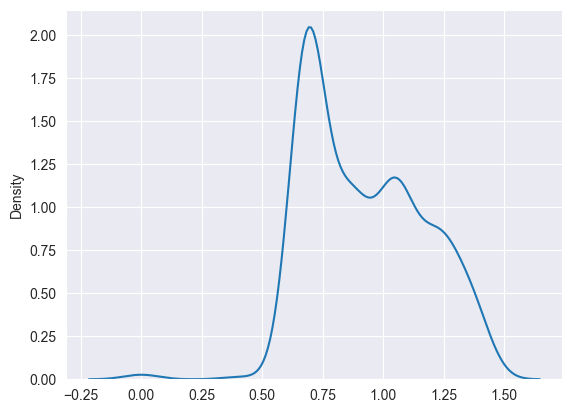

In [58]:
test_fare_boxcox, _ = stats.boxcox(test_fare)
sns.kdeplot(test_fare_boxcox)

완벽하지는 않지만 outlier도 줄어들고, skewness도 줄어들었다. (but still right skewed)

In [59]:
df.Fare = pd.Series(df_fare_boxcox) # 다시 넣어준다.
test.Fare = pd.Series(test_fare_boxcox)

In [60]:
df
test

,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_0,Embarked_1,Cabin_0,Cabin_1
0,0,0.210817,0.688455,False,False,True,True,False,True,False
1,1,0.857138,0.652014,False,False,True,False,True,True,False
2,0,1.558696,0.757594,False,True,False,True,False,True,False
3,0,-0.215929,0.721371,False,False,True,True,False,True,False
4,1,-0.523214,0.833245,False,False,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...
413,0,0.292183,0.697513,False,False,True,True,False,True,False
414,1,0.451517,1.309183,True,False,False,True,False,False,True
415,0,0.425261,0.663427,False,False,True,True,False,True,False
416,0,-1.646057,0.697513,False,False,True,True,False,True,False


In [61]:
df.info() # 모든 값들이 숫자로 바뀌었다.
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Sex         891 non-null    int64  
 2   Age         891 non-null    float64
 3   Fare        891 non-null    float64
 4   Pclass_1    891 non-null    bool   
 5   Pclass_2    891 non-null    bool   
 6   Pclass_3    891 non-null    bool   
 7   Embarked_0  891 non-null    bool   
 8   Embarked_1  891 non-null    bool   
 9   Cabin_0     891 non-null    bool   
 10  Cabin_1     891 non-null    bool   
dtypes: bool(7), float64(2), int64(2)
memory usage: 34.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sex         418 non-null    int64  
 1   Age         418 non-null    float64
 2   Fare        418 non-null    

이제 `Survived`, `Sex`, `Age`, Fare`, 와 Pclass, Embarked, Cabin을 모두 가공하였다.
학습 시켜보자.

## Train a model

In [62]:
X_train_total = df.drop('Survived', axis=1).values
test_target = test.values

In [91]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train_total, df.Survived.values, test_size=0.3, random_state=42) # 80%는 train, 20%는 test, random_state는 seed값

In [92]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((623, 10), (268, 10), (623,), (268,))

어떤 모델을 써야 할지 몰라 인터넷을 검색해 봤다.

[이 링크](https://www.kaggle.com/code/amitkumarjaiswal/beginner-s-tutorial-to-titanic-using-scikit-learn) 에서는 우리가 어떤것을 얻고 어떤 조건에 있으며 그래서 무엇을 써야 한다고 list-up을 해주긴 했는데 추가적으로 공부를 해야할 것 같다.

In [93]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

81.54

`로지스틱 회귀`는 feature들의 카테고리 혹은 독립적인 변수들 사이의 관계를 추정한다.
features 각각의 계수들을 비교해 보자

In [94]:
coeff_df = pd.DataFrame(df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
0,Sex,2.363809
4,Pclass_2,0.625443
9,Cabin_1,0.619332
7,Embarked_1,0.407273
2,Fare,0.152882
3,Pclass_1,0.020405
1,Age,-0.204025
6,Embarked_0,-0.407319
8,Cabin_0,-0.619379
5,Pclass_3,-0.645894


In [95]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.15

In [96]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

88.6

In [97]:
from sklearn.naive_bayes import GaussianNB

# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

78.01

In [98]:
from sklearn.linear_model import Perceptron

# Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

61.32

In [116]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree = 0

In [117]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest = 0

In [101]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

# Gradient Boosting
grad_boost = GradientBoostingClassifier(n_estimators = 100)
grad_boost.fit(X_train, Y_train)
Y_pred = grad_boost.predict(X_test)
grad_boost.score(X_train, Y_train)
acc_grad_boost = round(grad_boost.score(X_train, Y_train) * 100, 2)
acc_grad_boost

91.17

In [102]:
from sklearn.linear_model import RidgeClassifierCV

# RidgeClassifierCV
Ridge= RidgeClassifierCV()
Ridge.fit(X_train, Y_train)
Y_pred = Ridge.predict(X_test)
acc_Ridge= round(Ridge.score(X_train, Y_train) * 100, 2)
acc_Ridge

79.94

**각각의 모델들은 어떤 차이가 있는지 나중에 심도 있게 따로 공부해야 할것 같다...**

## Evaluate Model

In [106]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes', 'Perceptron', 'Grad boost','Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_perceptron, acc_grad_boost, acc_decision_tree]})

models.sort_values(by='Score', ascending=False)

,Model,Score
6,Grad boost,91.17
1,KNN,88.60
0,Support Vector Machines,83.15
2,Logistic Regression,81.54
4,Naive Bayes,78.01
5,Perceptron,61.32
3,Random Forest,0.00
7,Decision Tree,0.00


결론을 짓자면, `Random Forest`와 `Decision Tree`가 가장 높은 점수를 보여준다.

In [107]:
# 여기부터 맨끝까지 전부 kaggle에서 복붙함!

# Split the training set into a development and an evaluation sets
from sklearn.model_selection import train_test_split
X_dev, X_eval, y_dev, y_eval = train_test_split(X_train,
                                                Y_train,
                                                test_size=0.2,
                                                random_state=42)

In [112]:
from sklearn.model_selection import GridSearchCV
# 1. Random Forest
import time
dict_clf = {}


paramgrid = {
    'n_estimators':      [100, 150, 200, 250, 300, 400, 500],
    'criterion':         ['gini', 'entropy'],
    'max_features':      ['auto', 'log2'],
    'min_samples_leaf':  list(range(2, 8))
}
GS = GridSearchCV(RandomForestClassifier(random_state=77),
                  paramgrid,
                  cv=4)

# Fit the data and record time taking to train
t0 = time.time()
GS.fit(X_dev, y_dev)
t = time.time() - t0

# Store best parameters, score and estimator
best_clf = GS.best_estimator_
best_params = GS.best_params_
best_score = GS.best_score_

name = 'RF'

/Users/kreimben/Repository/ML_Notes/venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
336 fits failed out of a total of 672.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
336 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/kreimben/Repository/ML_Notes/venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kreimben/Repository/ML_Notes/venv/lib/python3.11/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/Users/kreimben/Repository/ML_Notes/venv/lib/python3.11/site-packages/sklearn/base.py", line 6

In [113]:
from sklearn.metrics import accuracy_score

best_clf.fit(X_dev, y_dev)
acc_eval = accuracy_score(y_eval, best_clf.predict(X_eval))

dict_clf[name] = {
    'best_par': best_params,
    'best_clf': best_clf,
    'best_score': best_score,
    'score_eval': acc_eval,
    'fit_time': t,
}

acc_eval

0.8

In [114]:
# 2. GradientBoosting
paramgrid = {
    'n_estimators':      [100, 150, 200, 250, 300, 400, 500],
    'max_features':      ['auto', 'log2'],
    'min_samples_leaf':  list(range(2, 7)),
    'loss' :             ['deviance', 'exponential'],
    'learning_rate':     [0.025, 0.05, 0.075, 0.1],
}
GS = GridSearchCV(GradientBoostingClassifier(random_state=77),
                  paramgrid,
                  cv=4)

# Fit the data and record time taking to train
t0 = time.time()
GS.fit(X_dev, y_dev)
t = time.time() - t0

# Store best parameters, score and estimator
best_clf = GS.best_estimator_
best_params = GS.best_params_
best_score = GS.best_score_

name = 'GB'
best_clf.fit(X_dev, y_dev)
acc_eval = accuracy_score(y_eval, best_clf.predict(X_eval))

dict_clf[name] = {
    'best_par': best_params,
    'best_clf': best_clf,
    'best_score': best_score,
    'score_eval': acc_eval,
    'fit_time': t,
}

/Users/kreimben/Repository/ML_Notes/venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
1680 fits failed out of a total of 2240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1120 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/kreimben/Repository/ML_Notes/venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kreimben/Repository/ML_Notes/venv/lib/python3.11/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/Users/kreimben/Repository/ML_Notes/venv/lib/python3.11/site-packages/sklearn/base.py", lin

In [115]:
for clf in dict_clf.keys():
    print("{0} classifier:\n\t- Best score = {1:.2%}".format(clf, dict_clf[clf]['best_score']))
    print("\t- Score on evaluation set = {0:.2%}".format(dict_clf[clf]['score_eval']))
    print("\t- Fitting time = {0:.1f} min".format(round(dict_clf[clf]['fit_time']/60, 1)))
    print("\t- Best parameters:")
    for par in sorted(dict_clf[clf]['best_par'].keys()):
        print("\t\t* {0}: {1}".format(par, dict_clf[clf]['best_par'][par]))

RF classifier:
	- Best score = 82.34%
	- Score on evaluation set = 80.00%
	- Fitting time = 0.7 min
	- Best parameters:
		* criterion: gini
		* max_features: log2
		* min_samples_leaf: 2
		* n_estimators: 100
GB classifier:
	- Best score = 83.34%
	- Score on evaluation set = 83.20%
	- Fitting time = 0.6 min
	- Best parameters:
		* learning_rate: 0.05
		* loss: exponential
		* max_features: log2
		* min_samples_leaf: 4
		* n_estimators: 400


In [118]:
from sklearn.ensemble import VotingClassifier

estimators = [('RF', dict_clf['RF']['best_clf']),
              ('GB', dict_clf['GB']['best_clf']),
              ('KNN', knn), ('svc', svc), ('trees', decision_tree)]

# Instantiate the VotingClassifier using hard voting
voter = VotingClassifier(estimators=estimators, voting='hard')
voter.fit(X_train, Y_train)

Y_pred = voter.predict(X_test).astype(int)
Y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0])

In [119]:
gender = pd.read_csv('gender.csv')
gender

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [120]:
predict = voter.predict(test_target)
pd.Series(predict)

0      0
1      1
2      0
3      0
4      0
      ..
413    0
414    1
415    0
416    0
417    0
Length: 418, dtype: int64

In [121]:
submission = pd.DataFrame({
        "PassengerId": gender.PassengerId,
        "Survived": predict
    })
submission.to_csv('myself_submission.csv', index=False)

![](myself1.png)

순위가 많이 올랐다.
아까 DicisionTree는 안올렸는데 이것도 적용 시켜서 올려보자.

In [88]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

98.88

In [89]:
predict = decision_tree.predict(test_target)
pd.Series(predict)

0      0
1      1
2      0
3      0
4      0
      ..
413    0
414    1
415    0
416    0
417    0
Length: 418, dtype: int64

In [90]:
submission = pd.DataFrame({
        "PassengerId": gender.PassengerId,
        "Survived": predict
    })
submission.to_csv('myself_2_submission.csv', index=False)

![](myself2.png)

하지만 순수하게 decision tree만 적용 시킨 모델은 오히려 점수가 떨어졌다. 어떻게 된 일일까?

분명히 훈련용, 검증용 8:2로 데이터를 분리 해 두어 훈련한 모델과 관계 없게 됐다.

1. 훈련데이터가 섞였다. (제대로 분리가 안됐다.)
1. 과적합

아무튼 모델 최적화를 하기 위해서 `GridSearchCV`를 사용해 최적의 parameter를 찾아야 한다는 것을 알았다.

추가적으로 공부 할것이 너무 많다...